# About this project (Urban Sound Classification)
I have selected this project because Audio Classification domain is growing in various fields like NLP, Voice Recognition, chatbots etc.  Dataset which is used is UrbanSound8k, which is available in kaggle as well as on other websites.
This dataset contains 8732 labeled sound  from 10 classes i.e air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music.An addition to this,  file also contain  Metadata.csv, which have information about all sounds

 # Importing necessary Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram as sp
import numpy as np
import seaborn as sns
import librosa
import librosa.effects
import librosa.display
import IPython.display as ipd
from warnings import filterwarnings
filterwarnings('ignore')
from tqdm import tqdm

In [2]:
#Reading a csv file
metadata = pd.read_csv('metadata/UrbanSound8K.csv')

# Info about the data

In [3]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
metadata.shape

(8732, 8)

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [6]:
#checking null value
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

mfccs_features = librosa.feature.mfcc(y=audio_file, sr=sampler, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# Loading Audio Data into the list

In [7]:
path = 'audio'

In [8]:
audio_data = []
label = []
for i in tqdm(range(8731)): #no. of rows in csv file from 0 to 8731
    audio_path = path + '/' + 'fold' + str(metadata['fold'][i]) + '/'+ str(metadata['slice_file_name'][i])
    audio_file,sampler= librosa.load(audio_path, res_type='kaiser_fast')
    audio_data.append(audio_file)
    label.append(metadata['class'][i])

100%|██████████| 8731/8731 [11:07<00:00, 13.09it/s]  


# EDA

In [9]:
print(len(audio_data))
print(len(label))

8731
8731


In [10]:
sampler # sample rate of audio samples

22050

# Making a dataframe of Audio and Class

In [11]:
df = pd.DataFrame(list(zip(audio_data,label)),columns=['Audio','Class'])

In [12]:
df.head()

,Audio,Class
0,"[-0.0033372005, -0.0051077097, -0.004619669, -...",dog_bark
1,"[0.0026579564, 0.0036793605, 0.0023116083, 0.0...",children_playing
2,"[-0.0026061474, -0.0031005086, -0.0015680841, ...",children_playing
3,"[0.00016145487, -0.00024093922, -0.0013598552,...",children_playing
4,"[0.0012324397, 0.0043110377, 0.006213885, 0.00...",children_playing


In [13]:
df.shape

(8731, 2)

In [14]:
uni = df['Class'].unique()
uni

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [15]:
#making sample of all classes
df_sample=[]
for k in uni:
    for i in range(200):
        if df['Class'][i]==k:
            df_sample.append(df['Audio'][i])
            break

In [16]:
sample= np.array(df_sample)

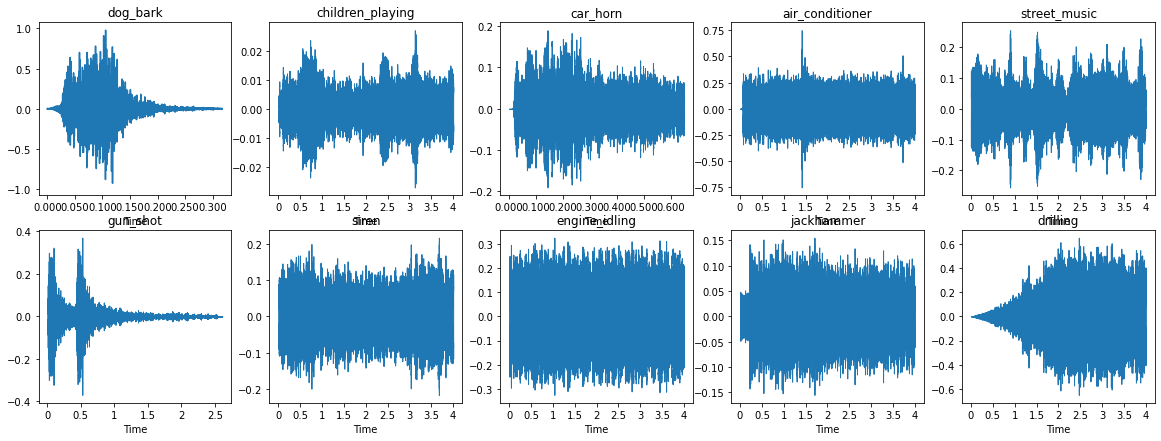

In [17]:
#waveplot of different classes
plt.figure(figsize=(20,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(uni[i])
    librosa.display.waveshow(sample[i])

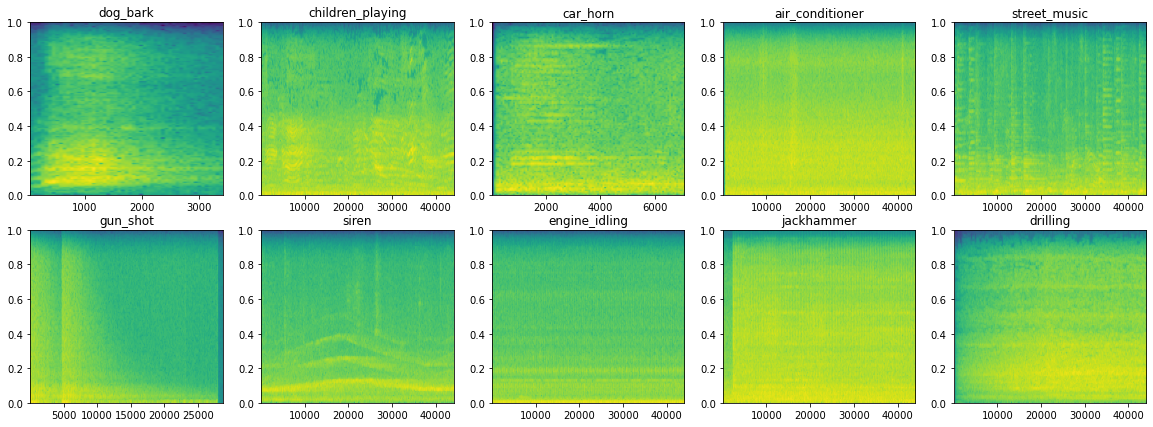

In [18]:
#spectogram of differnt classes
plt.figure(figsize=(20,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(uni[i])
    sp(sample[i])

In [19]:
print(uni[0])
ipd.Audio(sample[0],rate=22050)

dog_bark


In [20]:
print(uni[1])
ipd.Audio(sample[1],rate=22050)

children_playing


In [21]:
print(uni[2])
ipd.Audio(sample[2],rate=22050)

car_horn


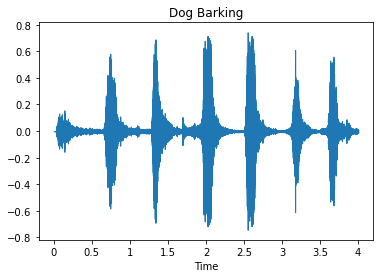

In [22]:
librosa.display.waveshow(df['Audio'][14], sr=sampler)
plt.title('Dog Barking')
plt.show()

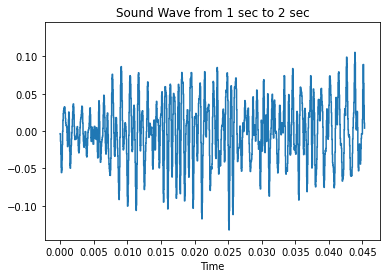

In [23]:
#Sound Wave from 1 sec to 2 sec
librosa.display.waveshow(df['Audio'][14][1000:2000], sr=sampler)
plt.title('Sound Wave from 1 sec to 2 sec')
plt.show()


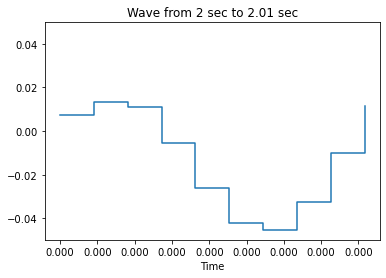

In [24]:
librosa.display.waveshow(df['Audio'][14][2000:2010], sr=sampler)
plt.title('Wave from 2 sec to 2.01 sec')
plt.show()

In [25]:
label[14]

'dog_bark'

In [26]:
ipd.Audio(df['Audio'][14],rate=sampler)

# Audio Augmentation
applying noise , stretch time, changing pitch etc.

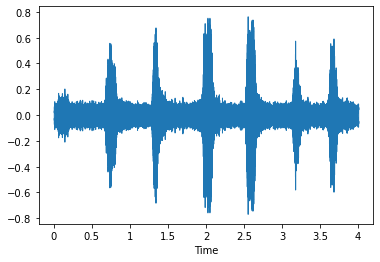

In [27]:
# noise addition # 0 and 1 are mean and standard deviation of the normal distribution
wav_noise = df['Audio'][14] + 0.03*np.random.normal(0,1,len(df['Audio'][14]))

librosa.display.waveshow(wav_noise, sr=sampler)
plt.show()                                                            

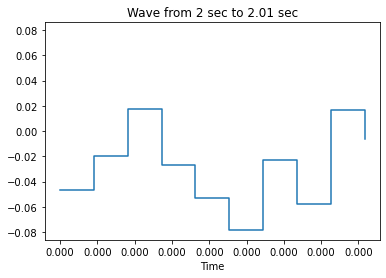

In [28]:
librosa.display.waveshow(wav_noise[2000:2010], sr=sampler)
plt.title('Wave from 2 sec to 2.01 sec')
plt.show()

In [29]:
ipd.Audio(wav_noise,rate=sampler)

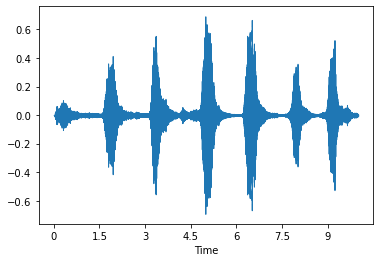

In [30]:
#Stretch factor. If rate > 1, then the signal is speed up. If rate < 1, then the signal is slowed down
wav_time_strch = librosa.effects.time_stretch(df['Audio'][14],rate=0.4)
librosa.display.waveshow(wav_time_strch, sr=sampler)
plt.show()  

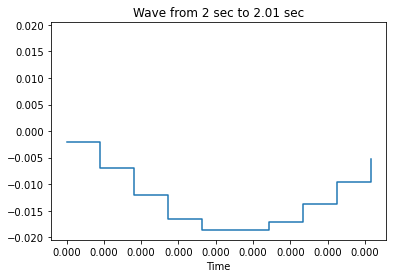

In [31]:
librosa.display.waveshow(wav_time_strch[2000:2010], sr=sampler)
plt.title('Wave from 2 sec to 2.01 sec')
plt.show()

In [32]:
ipd.Audio(wav_time_strch,rate=sampler)

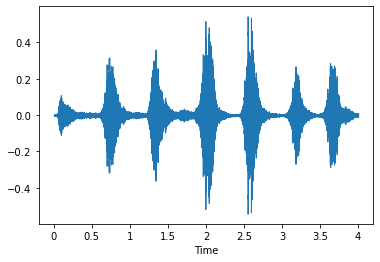

In [33]:
wav_pitch_shf = librosa.effects.pitch_shift(df['Audio'][14],sr=sampler,n_steps=-9)
librosa.display.waveshow(wav_pitch_shf, sr=sampler)
plt.show() 

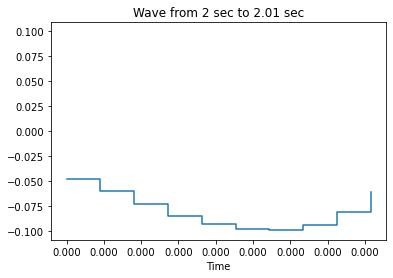

In [34]:
librosa.display.waveshow(wav_pitch_shf[2000:2010], sr=sampler)
plt.title('Wave from 2 sec to 2.01 sec')
plt.show()

In [35]:
ipd.Audio(wav_pitch_shf,rate=sampler)

# Various feature of Sound

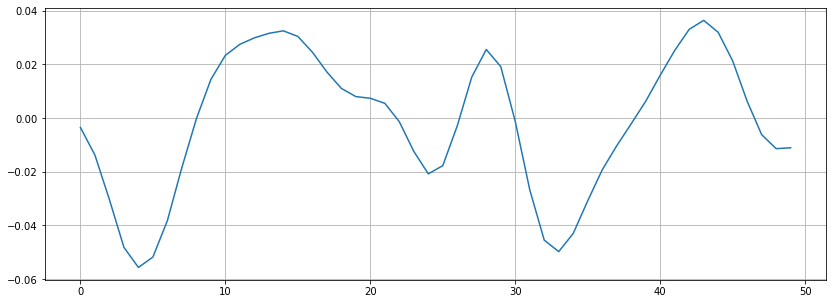

In [36]:
plt.figure(figsize=(14, 5))
plt.plot(df['Audio'][14][1000:1050])
plt.grid()
plt.show()
#it can be seen that number of times waves changing the sign is 6
#lets find out

In [37]:
z = sum(librosa.zero_crossings(df['Audio'][14][1000:1050],pad=False))
z

6

In [38]:
zc = sum(librosa.zero_crossings(audio_data[14], pad=False))
zc

13103

In [39]:
#zero crossing rate of one audio
zero_crossings_rate = sum(librosa.feature.zero_crossing_rate(df['Audio'][14] ,frame_length=2048,hop_length=512))

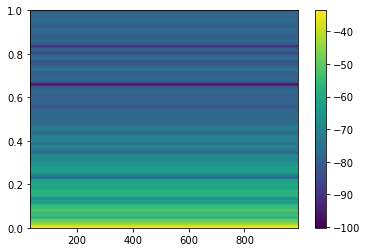

In [40]:
sp(zero_crossings_rate, NFFT=2048, scale='dB')
plt.colorbar()
plt.show()

In [41]:
#root mean square 
S, phase = librosa.magphase(librosa.stft(df['Audio'][14]))
rms = librosa.feature.rms(S, frame_length=512, hop_length=256, center=True)


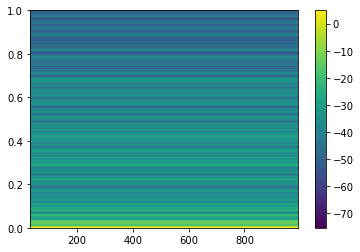

In [42]:
#spectogram for rms
sp(rms, NFFT=2048, scale='dB')
plt.colorbar()
plt.show()

In [43]:
spectral_centroids =librosa.feature.spectral_centroid(df['Audio'][14], sr=22050, hop_length=256)

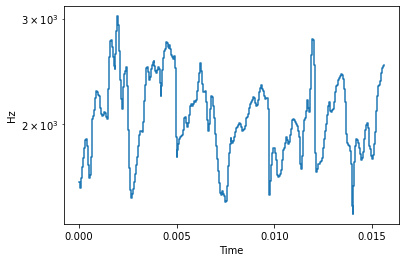

In [44]:
librosa.display.waveshow(spectral_centroids)
plt.semilogy()
plt.ylabel('Hz')
plt.show()

In [45]:
#spectral_bandwidth
spec_bw = librosa.feature.spectral_bandwidth(y=df['Audio'][14], sr=22050)

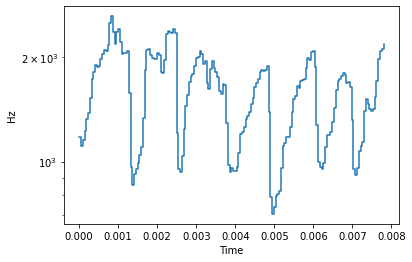

In [46]:
librosa.display.waveshow(spec_bw)
plt.semilogy()
plt.ylabel('Hz')
plt.show()

In [47]:
#mfccs
mfccs_features = librosa.feature.mfcc(y=df['Audio'][14], sr=22050, n_mfcc=40)
result = np.mean(mfccs_features.T,axis=0)

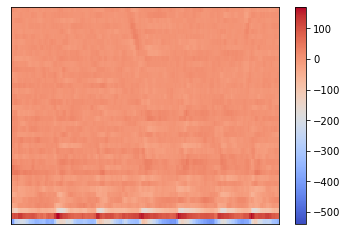

In [48]:
librosa.display.specshow(mfccs_features)
plt.colorbar()
plt.show()

In [49]:
#mel_spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y = df['Audio'][14], n_fft= 2048, sr = 22050, hop_length = 512 ,n_mels=50)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

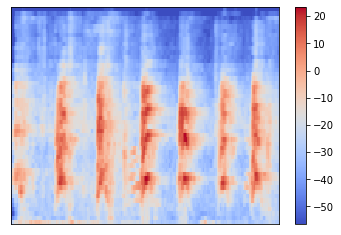

In [50]:
librosa.display.specshow(log_mel_spectrogram)
plt.colorbar()
plt.show()

# Lets check if data is balance or not

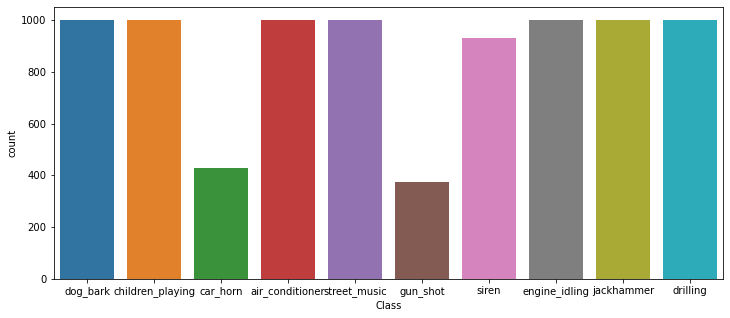

In [51]:

plt.figure(figsize=(12,5))
sns.countplot(df['Class'])
plt.show()

# Lets balance the Data using Audio Augmentation
(In this project as data consist of 8732 audio, therefore only two categories that is Car_horn and Gun_shot is augmented)

In [52]:
car_horn = pd.DataFrame(df[df['Class']=='car_horn']).reset_index()

In [53]:
car_horn.head()

,index,Audio,Class
0,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",car_horn
1,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",car_horn
2,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",car_horn
3,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",car_horn
4,13,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",car_horn


In [54]:
car_horn= car_horn.drop(['index'], axis=1)

In [55]:
car_horn.shape


(428, 2)

In [56]:
gun_shot =  pd.DataFrame(df[df['Class']=='gun_shot']).reset_index()

In [57]:
gun_shot.head()

,index,Audio,Class
0,106,"[4.681083e-05, 0.00046631927, 0.0010527532, 0....",gun_shot
1,496,"[0.00010305461, 0.00022250268, 0.00038890532, ...",gun_shot
2,611,"[-1.915045e-06, 2.7276812e-06, 1.7525502e-06, ...",gun_shot
3,626,"[-0.036880493, -0.032821655, -0.027038574, -0....",gun_shot
4,1000,"[-0.0023261409, -0.004399519, -0.005454403, -0...",gun_shot


In [58]:
gun_shot.shape

(374, 3)

In [59]:
gun_shot= gun_shot.drop(['index'], axis=1)

In [60]:
gun_shot.head()

,Audio,Class
0,"[4.681083e-05, 0.00046631927, 0.0010527532, 0....",gun_shot
1,"[0.00010305461, 0.00022250268, 0.00038890532, ...",gun_shot
2,"[-1.915045e-06, 2.7276812e-06, 1.7525502e-06, ...",gun_shot
3,"[-0.036880493, -0.032821655, -0.027038574, -0....",gun_shot
4,"[-0.0023261409, -0.004399519, -0.005454403, -0...",gun_shot


# function for Audio Augmentation

In [77]:
augmented_audio = []
label_for_augmented_audio = []
def audio_augmentation(audio,label):
    wav_n = audio + 0.01*np.random.normal(0,1,len(audio))#Noise addition using normal distribution with mean = 0 and std =1
    augmented_audio.append(wav_n)
    label_for_augmented_audio.append(label)

    wav_time_stch = librosa.effects.time_stretch(audio,rate=0.4)
    augmented_audio.append(wav_time_stch)
    label_for_augmented_audio.append(label)
    
    wav_pitch_sf = librosa.effects.pitch_shift(audio,sr=sampler,n_steps=-5)
    augmented_audio.append(wav_pitch_sf)
    label_for_augmented_audio.append(label)


In [78]:
for i in tqdm(range(190)):
    audio_augmentation( car_horn['Audio'][i],'car_horn') #for car horn
for i in tqdm(range(210)):
    audio_augmentation( gun_shot['Audio'][i],'gun_shot') #for gun shot
    

100%|██████████| 210/210 [01:30<00:00,  2.32it/s]


In [79]:
len(augmented_audio)

1200

In [80]:
len(label_for_augmented_audio)

1200

In [81]:
Augmented_data = pd.DataFrame(list(zip(augmented_audio,label_for_augmented_audio)),columns=['Audio','Class'])


In [82]:
Augmented_data.shape

(1200, 2)

Merging all data

In [83]:
final_data = pd.concat([df,Augmented_data],axis=0,ignore_index=True)

In [84]:
final_data.shape

(9931, 2)

In [85]:
final_data.head()

,Audio,Class
0,"[-0.0033372005, -0.0051077097, -0.004619669, -...",dog_bark
1,"[0.0026579564, 0.0036793605, 0.0023116083, 0.0...",children_playing
2,"[-0.0026061474, -0.0031005086, -0.0015680841, ...",children_playing
3,"[0.00016145487, -0.00024093922, -0.0013598552,...",children_playing
4,"[0.0012324397, 0.0043110377, 0.006213885, 0.00...",children_playing


In [86]:
final_data['Class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

checking if data is balance

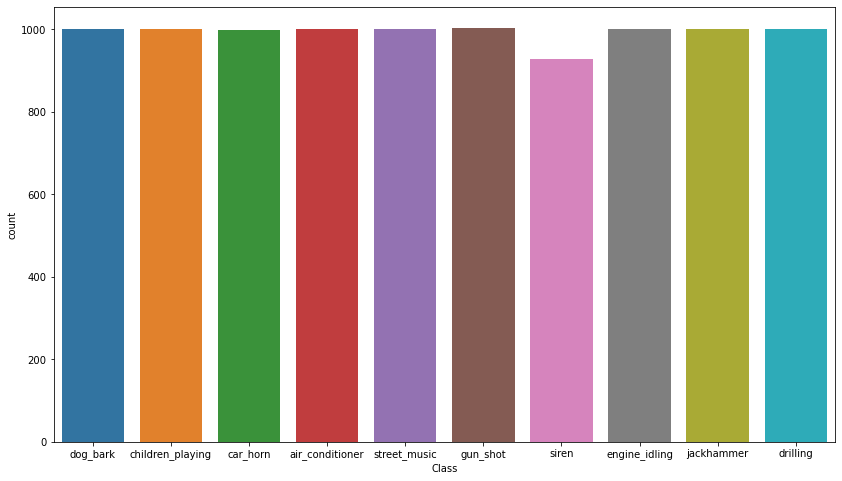

In [87]:
plt.figure(figsize=(14,8))
sns.countplot(final_data['Class'])
plt.show()

In [88]:
final_data['Class'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9931 entries, 0 to 9930
Series name: Class
Non-Null Count  Dtype 
--------------  ----- 
9931 non-null   object
dtypes: object(1)
memory usage: 77.7+ KB


independent and dependent variables

In [89]:
X= final_data['Audio']
Y = final_data['Class']

# Feature Extraction (by using function)

In [90]:
def zero_crossing_rate(audio):
    result = librosa.feature.zero_crossing_rate(audio,frame_length=1024, hop_length=512)
    return result
def root_mean_square(audio):
    result = librosa.feature.rms(audio, frame_length=512, hop_length=256, center=True)
    return result
def spectral_centroids(audio):
    result= librosa.feature.spectral_centroid(audio, sr=22050)
    return result

def spectral_bandwidth(audio):
    result= librosa.feature.spectral_bandwidth(audio, sr=22050)
    return result

def mfccs(audio):
    mfccs_features = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=40)
    result = np.mean(mfccs_features.T,axis=0) #scaled mfccs
    return result

def Mag_spec(audio):
    signal_ft = np.fft.fft(audio)
    magnitude_spectrum = np.abs(signal_ft)
    return magnitude_spectrum
    

def log_mel(audio):
    mel_spectrogram = librosa.feature.melspectrogram(y = audio, n_fft= 2048, sr = 22050, hop_length = 512 ,n_mels=50)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    return log_mel_spectrogram


def Chroma_stft(audio):  
    c_stft = librosa.feature.chroma_stft(y = audio,sr = 22050)
    return c_stft

def spec_roll_off(audio):
    return librosa.feature.spectral_rolloff(audio,sr= 22050)

def spec_contrast(audio):
    return librosa.feature.spectral_contrast(audio,sr= 22050)


def tempogram(audio):
    return librosa.feature.tempogram(y= audio, sr =22050)



def chroma_ctq(audio):
    chroma_cq = librosa.feature.chroma_cqt(y=audio,sr=22050)
    return chroma_cq

def spectral_flatness(audio):
    flatness = librosa.feature.spectral_flatness(y=audio)
    return flatness


Making list of all features

In [92]:
X_zcr,X_zcr_var, X_rms,X_rms_var,X_spec_cent,X_spec_cent_var,X_spec_band,X_spec_band_var=[],[],[],[],[],[],[],[]
X_mfccs,X_mfccs_var, X_mag_spec,X_mag_spec_var,X_log_mel,X_log_mel_var,X_chroma_stft,X_chroma_stft_var=[],[],[],[],[],[],[],[]
X_spec_roll,X_spec_roll_var,X_spec_contr,X_spec_contr_var,X_tempo,X_tempo_var= [],[],[],[],[],[]
X_chroma_ctq,X_chroma_ctq_var, X_spec_flat,X_spec_flat_var = [],[],[],[]
mfccs_feature = []  

Feature extraction from independent variable by using for loop

In [93]:
for i in tqdm(range(len(X))):
    X_zcr.append(zero_crossing_rate(X[i]).mean())
    X_zcr_var.append(zero_crossing_rate(X[i]).var())
    X_rms.append(root_mean_square(X[i]).mean())
    X_rms_var.append(root_mean_square(X[i]).var())
    X_spec_cent.append(spectral_centroids(X[i]).mean())
    X_spec_cent_var.append(spectral_centroids(X[i]).var())
    X_spec_band.append(spectral_bandwidth(X[i]).mean())
    X_spec_band_var.append(spectral_bandwidth(X[i]).var())
    X_mfccs.append(mfccs(X[i]).mean())
    X_mfccs_var.append(mfccs(X[i]).var())
    
    mfccs_feature.append(mfccs(X[i]))
    
    X_mag_spec.append(Mag_spec(X[i]).mean())
    X_mag_spec_var.append(Mag_spec(X[i]).var())
    X_log_mel.append(log_mel(X[i]).mean())
    X_log_mel_var.append(log_mel(X[i]).var())
    X_chroma_stft.append(Chroma_stft(X[i]).mean())
    X_chroma_stft_var.append(Chroma_stft(X[i]).var())
    X_spec_roll.append(spec_roll_off(X[i]).mean())
    X_spec_roll_var.append(spec_roll_off(X[i]).var())
    X_spec_contr.append(spec_contrast(X[i]).mean())
    X_spec_contr_var.append(spec_contrast(X[i]).var())
    X_tempo.append(tempogram(X[i]).mean())
    X_tempo_var.append(tempogram(X[i]).var())

    X_chroma_ctq.append(chroma_ctq(X[i]).mean())
    X_chroma_ctq_var.append(chroma_ctq(X[i]).var())
    X_spec_flat.append(spectral_flatness(X[i]).mean())
    X_spec_flat_var.append(spectral_flatness(X[i]).var())
   
    

100%|██████████| 9931/9931 [2:32:37<00:00,  1.08it/s]  


making data frame for all features

In [99]:

 columns=['X_zcr','X_zcr_var', 'X_rms','X_rms_var','X_spec_cent','X_spec_cent_var',
                                          'X_spec_band','X_spec_band_var','X_mfccs','X_mfccs_var', 'X_mag_spec',
                                          'X_mag_spec_var','X_log_mel','X_log_mel_var','X_chroma_stft','X_chroma_stft_var',
                                     'X_spec_roll','X_spec_roll_var','X_spec_contr','X_spec_contr_var','X_tempo',
                                          'X_tempo_var','X_chroma_ctq','X_chroma_ctq_var', 'X_spec_flat','X_spec_flat_var']
feature_data = pd.DataFrame(list(zip(X_zcr,X_zcr_var, X_rms,X_rms_var,X_spec_cent,X_spec_cent_var,X_spec_band,X_spec_band_var,
                            X_mfccs,X_mfccs_var, X_mag_spec,X_mag_spec_var,X_log_mel,X_log_mel_var,X_chroma_stft,
                                     X_chroma_stft_var, X_spec_roll,X_spec_roll_var,X_spec_contr,X_spec_contr_var,
                                     X_tempo,X_tempo_var,X_chroma_ctq,X_chroma_ctq_var, X_spec_flat,X_spec_flat_var)),
                                 columns=columns)

In [100]:
feature_data.head()

,X_zcr,X_zcr_var,X_rms,X_rms_var,X_spec_cent,X_spec_cent_var,X_spec_band,X_spec_band_var,X_mfccs,X_mfccs_var,...,X_spec_roll,X_spec_roll_var,X_spec_contr,X_spec_contr_var,X_tempo,X_tempo_var,X_chroma_ctq,X_chroma_ctq_var,X_spec_flat,X_spec_flat_var
0,0.128557,0.000664,0.110705,1.412870e-02,2006.285513,40198.989386,1547.242625,17157.018923,-10.399365,1772.431274,...,2793.164062,41925.083399,21.853407,131.701745,0.008554,0.003428,0.523686,0.058061,0.003179,0.000002
1,0.138542,0.001719,0.003960,1.474465e-06,2076.908755,55999.368742,1856.730863,17944.337886,-5.850330,4971.956543,...,3927.133479,35227.739739,20.607879,167.996529,0.235358,0.095191,0.704623,0.031812,0.006701,0.000009
2,0.101636,0.000833,0.002980,5.375740e-07,1784.415678,31901.415074,1823.622936,6797.684824,-6.539690,5753.665527,...,3624.797349,84850.694094,19.983617,155.623490,0.237030,0.100517,0.682206,0.032787,0.004946,0.000003
3,0.128731,0.002387,0.004569,3.982630e-06,2173.433436,155718.965378,2074.007371,72855.590048,-6.391218,4645.759766,...,4326.929134,731112.767427,20.792833,147.308087,0.197072,0.077008,0.603847,0.043878,0.011647,0.000178
4,0.117825,0.001038,0.003200,3.991745e-07,1949.300041,24099.774756,1841.513938,8267.301802,-5.994750,5485.460449,...,3880.084052,36853.636730,19.983016,150.541166,0.233808,0.097760,0.556577,0.041236,0.005798,0.000005


In [101]:
feature_data.shape

(9931, 26)

In [102]:
feature_data.isnull().sum()

X_zcr                0
X_zcr_var            0
X_rms                0
X_rms_var            0
X_spec_cent          0
X_spec_cent_var      0
X_spec_band          0
X_spec_band_var      0
X_mfccs              0
X_mfccs_var          0
X_mag_spec           0
X_mag_spec_var       0
X_log_mel            0
X_log_mel_var        0
X_chroma_stft        0
X_chroma_stft_var    0
X_spec_roll          0
X_spec_roll_var      0
X_spec_contr         0
X_spec_contr_var     0
X_tempo              0
X_tempo_var          0
X_chroma_ctq         0
X_chroma_ctq_var     0
X_spec_flat          0
X_spec_flat_var      0
dtype: int64

Histogram for all features

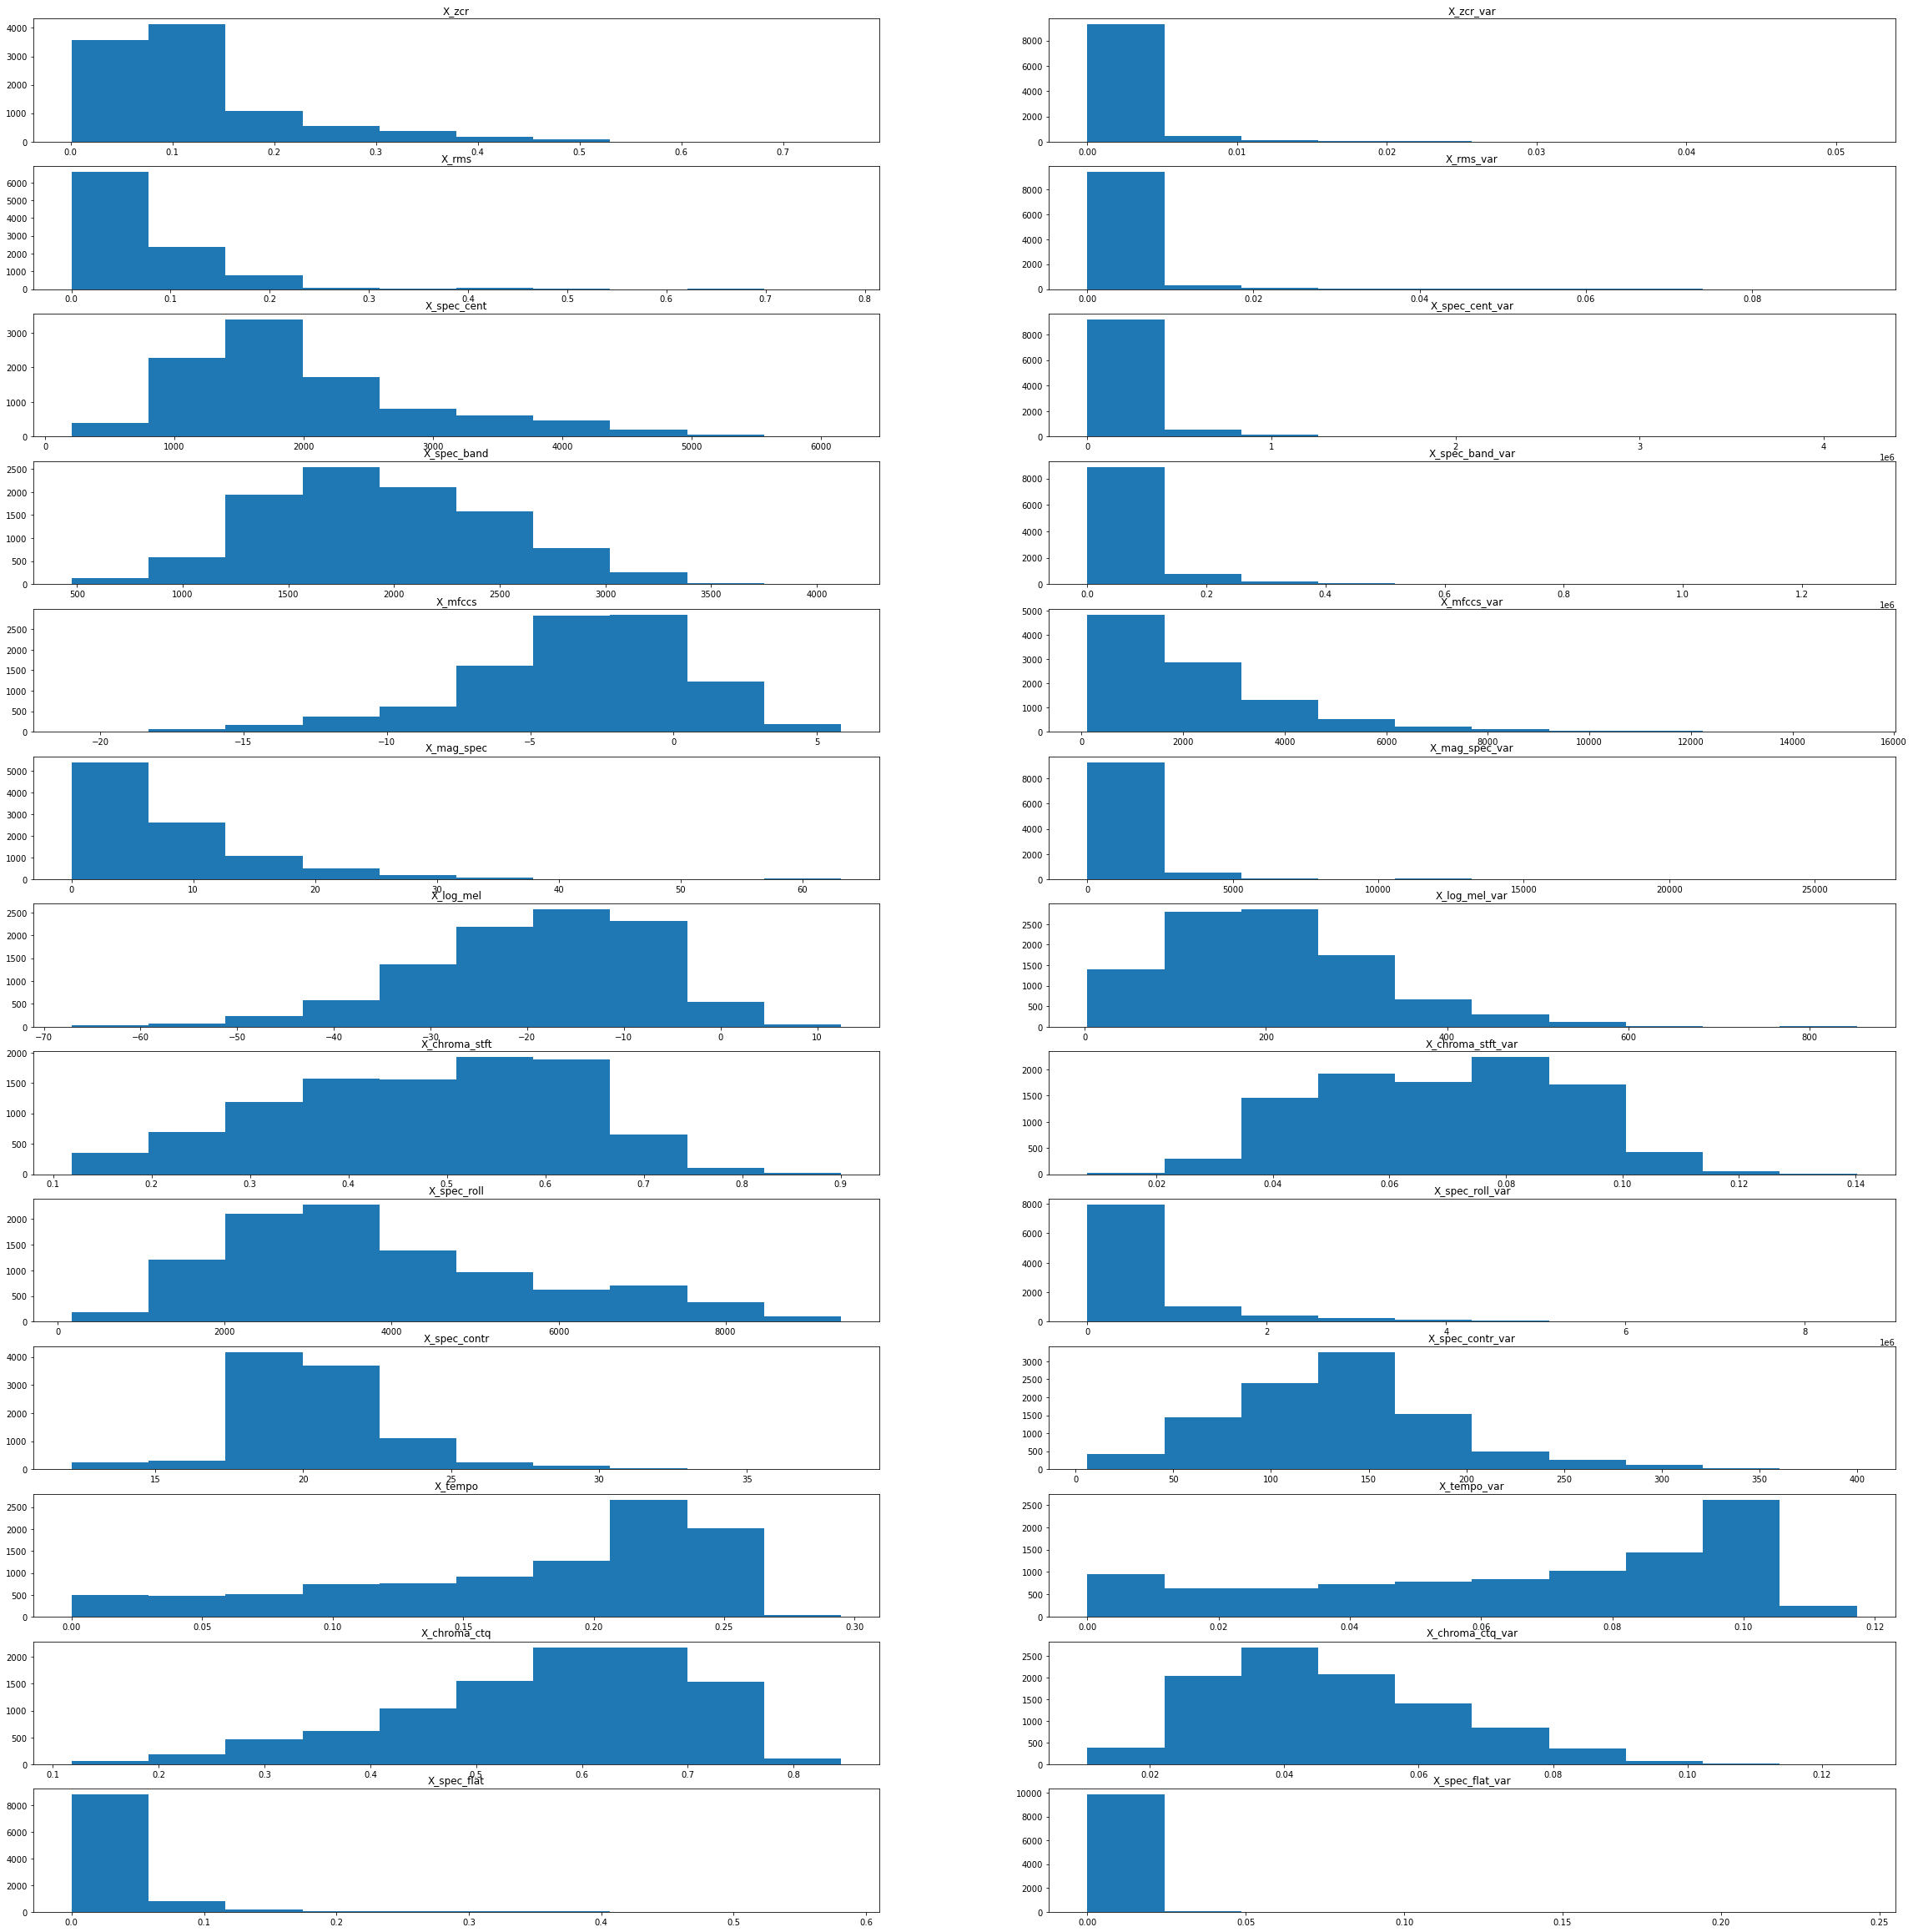

In [110]:
plt.figure(figsize=(40,45))
for i in range(26):
    plt.subplot(14,2,i+1)
    plt.hist(feature_data.iloc[:,i])
    plt.title(columns[i])

In [111]:
corr= feature_data.corr()

# Correlation between all feature

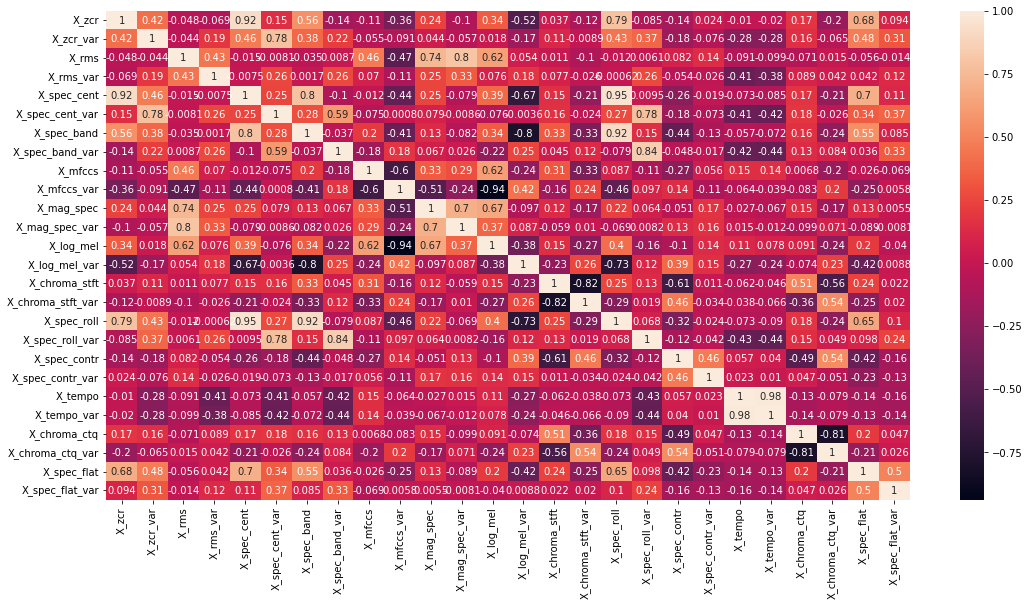

In [112]:
plt.figure(figsize=(18,9))
sns.heatmap(corr, annot=True)
plt.show()

# Dropping highly correlated feature

In [116]:
 upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


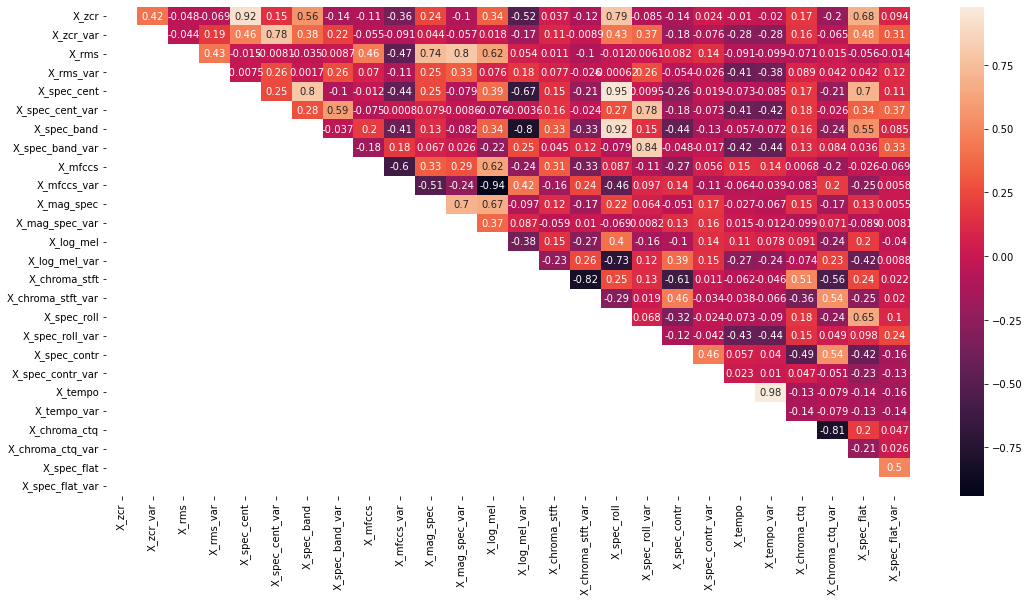

In [117]:
plt.figure(figsize=(18,9))
sns.heatmap(upper_tri, annot=True)
plt.show()

In [118]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print()
print(to_drop)


['X_spec_cent', 'X_spec_roll', 'X_tempo_var']


In [121]:
#dropping above column
df = feature_data.drop(['X_spec_cent', 'X_spec_roll', 'X_tempo_var'], axis=1)

In [122]:
df.shape

(9931, 23)

# Classification Model Based upon ML Algorithm

In [123]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)

In [127]:
y.shape

(9931,)

In [128]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_= scale.fit_transform(df)

In [132]:
X_.shape

(9931, 23)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=.3, random_state=30)

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier ,AdaBoostClassifier ,VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
KnnC = KNeighborsClassifier(n_neighbors=4)
RFC = RandomForestClassifier(n_estimators=200,random_state=42)
EXTC = ExtraTreesClassifier(n_estimators=250,random_state=42)
xgbc = XGBClassifier(n_estimators=150, max_depth=10)
svc = SVC(C=100,kernel='rbf')
estimator=  [
          ('KnnC',KnnC),
          ('RFC',RFC),
          ('EXTC',EXTC),
           ('xgbc',xgbc),
          ('svc',svc)]
vote = VotingClassifier(estimators = estimator, voting ='hard')
stc = StackingClassifier(estimators=estimator, final_estimator=vote)

In [238]:
models = [
          KnnC,
          RFC,
          EXTC,
          xgbc,
          svc,
         vote,
         stc]

In [239]:
acc ,confusion= [] ,[]
for i in tqdm(models):
    train = i.fit(X_train,y_train)
    y_pred = train.predict(X_test)
    acc.append((accuracy_score(y_test, y_pred) * 100))
    confusion.append(confusion_matrix(y_test,y_pred))

100%|██████████| 7/7 [03:00<00:00, 25.78s/it]


In [240]:
classifier_name = [
          'K nearest neigbor',
          'Random Forest Classifier',
          'Extra Trees Classifier',
          'XGboost Classifier',
          'Support Vector Classifier',
          'Voting Classifier_hard',
          'Stacking Classifier']
results  = pd.DataFrame(list(zip(classifier_name,acc,confusion)),columns=['classifier Name','Accuracy',
                                                                                         'Confusion Matrix'])
results

,classifier Name,Accuracy,Confusion Matrix
0,K nearest neigbor,85.973154,"[[271, 0, 2, 3, 1, 2, 0, 1, 1, 2], [6, 251, 10..."
1,Random Forest Classifier,87.818792,"[[260, 1, 5, 1, 1, 6, 1, 2, 0, 6], [0, 265, 7,..."
2,Extra Trees Classifier,90.369128,"[[269, 0, 2, 1, 2, 2, 1, 2, 1, 3], [0, 274, 6,..."
3,XGboost Classifier,89.261745,"[[265, 0, 4, 1, 1, 2, 1, 3, 2, 4], [1, 271, 6,..."
4,Support Vector Classifier,89.463087,"[[266, 0, 5, 0, 2, 1, 0, 1, 3, 5], [1, 269, 1,..."
5,Voting Classifier_hard,90.939597,"[[270, 0, 3, 0, 1, 2, 1, 2, 1, 3], [0, 278, 6,..."
6,Stacking Classifier,92.617450,"[[270, 0, 2, 1, 3, 2, 0, 1, 1, 3], [0, 282, 2,..."


Confusion Matrix for K nearest neigbor


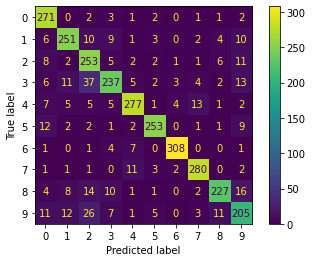

Confusion Matrix for Random Forest Classifier


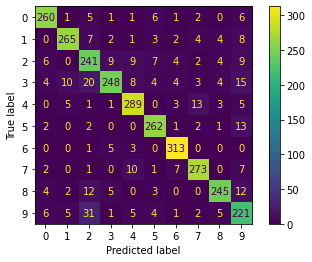

Confusion Matrix for Extra Trees Classifier


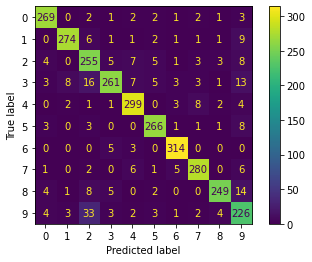

Confusion Matrix for XGboost Classifier


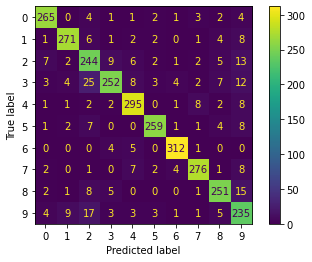

Confusion Matrix for Support Vector Classifier


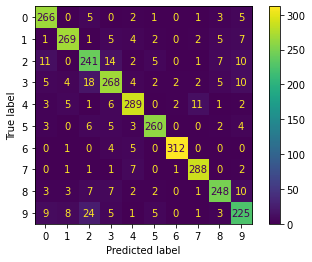

Confusion Matrix for Voting Classifier_hard


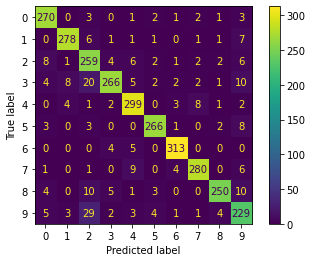

Confusion Matrix for Stacking Classifier


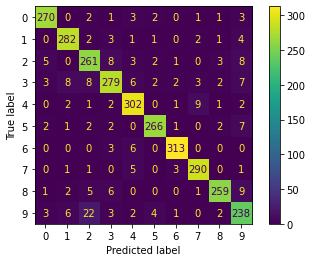

In [241]:
for i in range(7):
    print("Confusion Matrix for",results['classifier Name'][i])
    dis = ConfusionMatrixDisplay(confusion[i])
    dis.plot()
    plt.show()

# Classification Model using only MFCCS

In [242]:
X_mfccs_ = np.array(mfccs_feature)
X_mfccs_.shape

(9931, 40)

In [243]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_mfccs= scale.fit_transform(X_mfccs_)

In [244]:
X_mfccs.shape

(9931, 40)

In [245]:
X_mfccs

array([[ 0.07420384, -0.89795177, -3.32598968, ..., -0.18589838,
         0.08058689, -0.00824307],
       [-1.51584629, -0.10154838, -0.81545706, ...,  0.23198653,
         0.09828526,  0.00339427],
       [-1.78266825,  0.14364764, -0.60808064, ...,  0.52120343,
         0.64688663, -0.26821331],
       ...,
       [ 0.20619577, -1.96524296,  0.8818172 , ...,  0.37578088,
         0.69694514,  0.16085436],
       [-1.38176628, -1.52604225,  0.84109779, ...,  0.44588627,
         0.53805936,  0.17853668],
       [-1.52191423, -1.23181132,  0.68700182, ...,  0.7156008 ,
         0.89005699,  0.67500967]])

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mfccs,y,test_size=0.3, random_state=30

In [332]:
#KnnC = KNeighborsClassifier(n_neighbors=5)
RFC =  RandomForestClassifier(n_estimators=250,random_state=30)
EXTC = ExtraTreesClassifier(n_estimators=200,random_state=30)
xgbc = XGBClassifier(n_estimators=200,max_depth=10)
svc = SVC(C=10,kernel='rbf')

estimator=  [
          ('RFC',RFC),
          ('EXTC',EXTC),
           ('xgbc',xgbc),
          ('svc',svc)]
vote = VotingClassifier(estimators = estimator, voting ='hard')
stc = StackingClassifier(estimators=estimator, final_estimator=vote)

In [336]:
models = [
          RFC,
          EXTC,
          xgbc,
         vote,
         stc]

In [337]:
acc ,confusion= [] ,[]
for i in tqdm(models):
    train = i.fit(X_train,y_train)
    y_pred = train.predict(X_test)
    acc.append((accuracy_score(y_test, y_pred) * 100))
    confusion.append(confusion_matrix(y_test,y_pred))

100%|██████████| 5/5 [06:03<00:00, 72.66s/it] 


In [338]:
classifier_name = [
          'Random Forest Classifier',
          'Extra Trees Classifier',
          'XGboost Classifier',
          'Support Vector Classifier',
          'Voting Classifier_hard',
          'Stacking Classifier']
results  = pd.DataFrame(list(zip(classifier_name,acc,confusion)),columns=['classifier Name','Accuracy',
                                                                                         'Confusion Matrix'])
results

,classifier Name,Accuracy,Confusion Matrix
0,Random Forest Classifier,90.973154,"[[273, 0, 2, 0, 1, 1, 0, 1, 0, 5], [0, 280, 1,..."
1,Extra Trees Classifier,93.422819,"[[276, 0, 2, 0, 1, 0, 0, 0, 1, 3], [0, 284, 1,..."
2,XGboost Classifier,90.536913,"[[276, 0, 0, 0, 0, 0, 0, 1, 0, 6], [0, 282, 1,..."
3,Support Vector Classifier,93.758389,"[[277, 0, 1, 0, 0, 0, 0, 1, 0, 4], [0, 289, 1,..."
4,Voting Classifier_hard,95.033557,"[[279, 0, 1, 0, 0, 0, 0, 0, 1, 2], [0, 293, 0,..."


Confusion Matrix for Random Forest Classifier


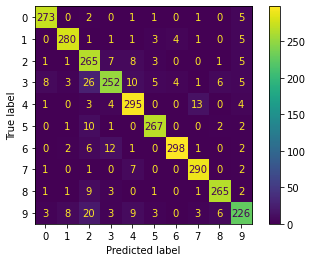

Confusion Matrix for Extra Trees Classifier


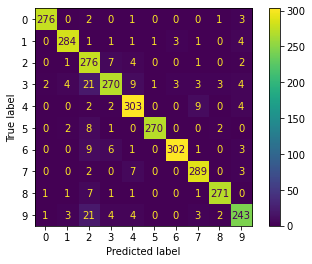

Confusion Matrix for XGboost Classifier


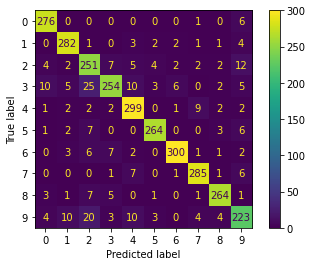

Confusion Matrix for Support Vector Classifier


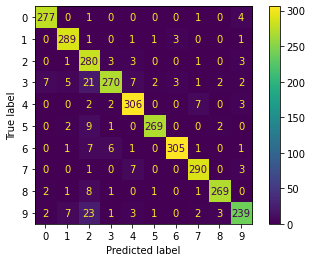

Confusion Matrix for Voting Classifier_hard


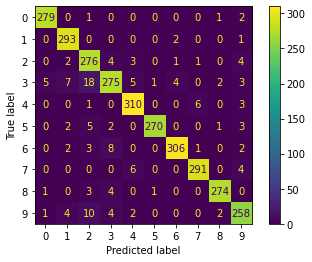

In [339]:
for i in range(5):
    print("Confusion Matrix for",results['classifier Name'][i])
    dis = ConfusionMatrixDisplay(confusion[i])
    dis.plot()
    plt.show()

# Using ANN 

In [347]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Activation , Dropout

In [352]:

model=Sequential()

model.add(Dense(4096,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))
          
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.2))
          
          
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 4096)              167936    
                                                                 
 activation_21 (Activation)  (None, 4096)              0         
                                                                 
 dropout_18 (Dropout)        (None, 4096)              0         
                                                                 
 dense_22 (Dense)            (None, 2048)              8390656   
                                                                 
 activation_22 (Activation)  (None, 2048)              0         
                                                                 
 dropout_19 (Dropout)        (None, 2048)              0         
                                                                 
 dense_23 (Dense)            (None, 1024)             

In [353]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [354]:
training = model.fit(X_train, y_train, batch_size=250, epochs=100, validation_data=(X_test, y_test) )

Epoch 1/100
28/28 [==============================] - 10s 341ms/step - loss: 1.8251 - accuracy: 0.3352 - val_loss: 1.2499 - val_accuracy: 0.5832
Epoch 2/100
28/28 [==============================] - 10s 367ms/step - loss: 1.2088 - accuracy: 0.5917 - val_loss: 0.8772 - val_accuracy: 0.7221
Epoch 3/100
28/28 [==============================] - 11s 398ms/step - loss: 0.8656 - accuracy: 0.7244 - val_loss: 0.6425 - val_accuracy: 0.7973
Epoch 4/100
28/28 [==============================] - 12s 417ms/step - loss: 0.6189 - accuracy: 0.8102 - val_loss: 0.5207 - val_accuracy: 0.8379
Epoch 5/100
28/28 [==============================] - 12s 427ms/step - loss: 0.4970 - accuracy: 0.8515 - val_loss: 0.4399 - val_accuracy: 0.8668
Epoch 6/100
28/28 [==============================] - 13s 455ms/step - loss: 0.3845 - accuracy: 0.8846 - val_loss: 0.4273 - val_accuracy: 0.8715
Epoch 7/100
28/28 [==============================] - 12s 445ms/step - loss: 0.3347 - accuracy: 0.8997 - val_loss: 0.3765 - val_accuracy:

In [355]:
train_hist = pd.DataFrame(training.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.825102,0.335204,1.249859,0.583221
1,1.208755,0.591713,0.877183,0.722148
2,0.865568,0.724356,0.642499,0.797315
3,0.618869,0.810243,0.520728,0.837919
4,0.497033,0.851532,0.439905,0.866779
...,...,...,...,...
95,0.020509,0.994389,0.391702,0.938591
96,0.015145,0.994821,0.461021,0.931208
97,0.024428,0.993095,0.414571,0.936577
98,0.017845,0.995828,0.384636,0.934228


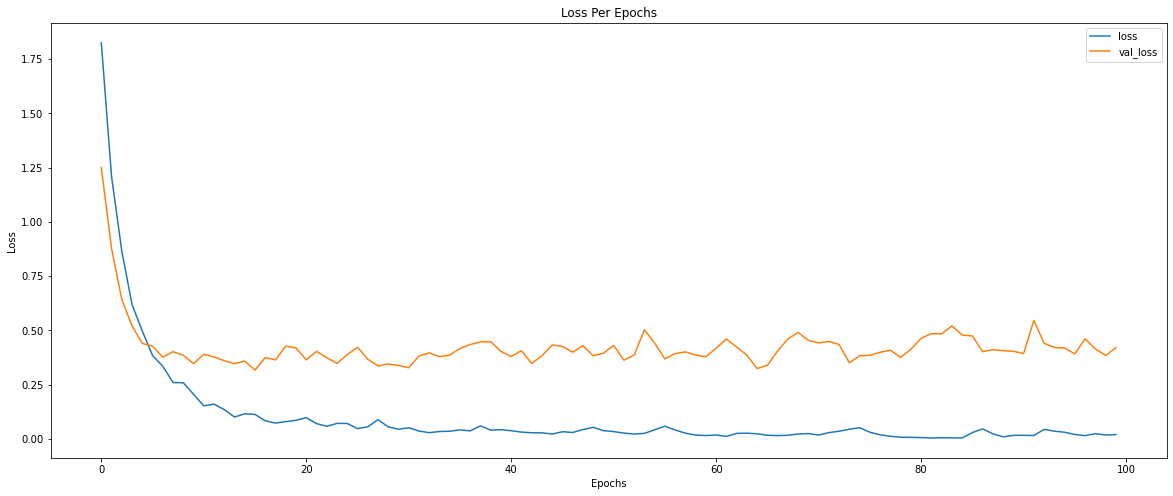

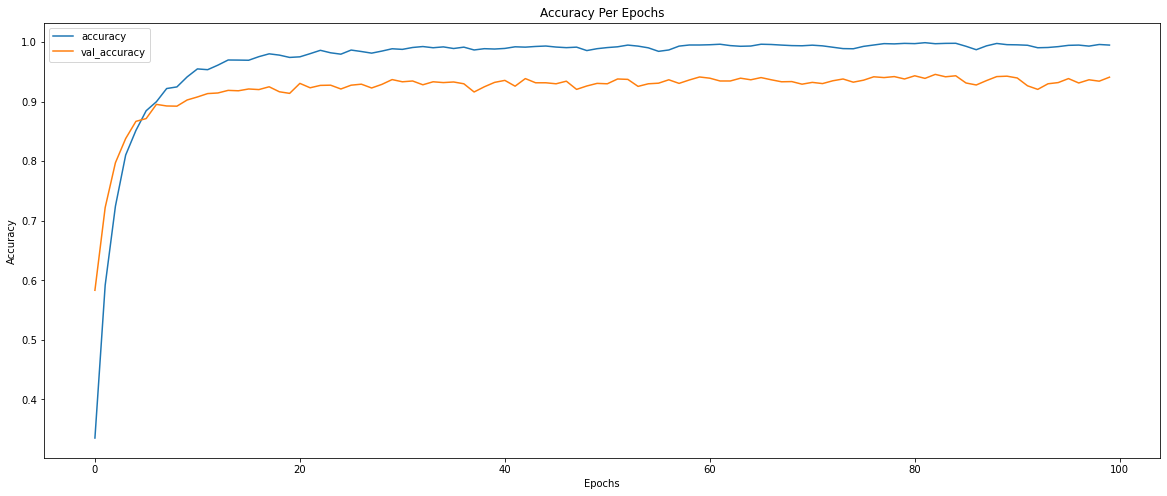

In [356]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.title('Loss Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Conclusion:
Model was build by using ML algorithm and ANN

# PROJECT BY MUHAMMAD HUSSAIN KHAN